In [1]:
 import pandas as pd # Import pandas
 from sklearn.preprocessing import StandardScaler
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from keras.models import Sequential
 from keras.layers import Dense, Dropout
 from keras.callbacks import EarlyStopping
 import warnings
 warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Boston_house_Pricing_data.csv')

In [9]:
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [11]:
X = df.drop(columns=['MEDV'])
Y = df['MEDV']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [15]:
print(X_scaled_df.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.406863 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.188058  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.273560 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.007868 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.219569 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [18]:
 print('Training set shape:', X_train.shape, y_train.shape)
 print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [19]:
 model = Sequential()
 model.add(Dense(64, input_dim=13, activation='relu'))
 model.add(Dropout(0.2))
 model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
 model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

In [26]:
import matplotlib.pyplot as plt
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [29]:
 history = model.fit(X_train, y_train, validation_split=0.2, epochs=100,batch_size=32, callbacks=[early_stopping])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 7329.7324 - mean_absolute_error: 73.5172 - val_loss: 585.5502 - val_mean_absolute_error: 22.7133
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 604.1584 - mean_absolute_error: 22.8320 - val_loss: 584.2266 - val_mean_absolute_error: 22.6841
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 641.9938 - mean_absolute_error: 23.5237 - val_loss: 582.9203 - val_mean_absolute_error: 22.6553
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 583.9531 - mean_absolute_error: 22.2745 - val_loss: 581.6051 - val_mean_absolute_error: 22.6263
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 597.0172 - mean_absolute_error: 22.4823 - val_loss: 580.2634 - val_mean_absolute_error: 22.5966
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 624.4578 - mean_absolute_error: 23.0556 - val_loss: 578.8891 - val_mean_absolute_error: 22.5662
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 580.1761 - mean_a

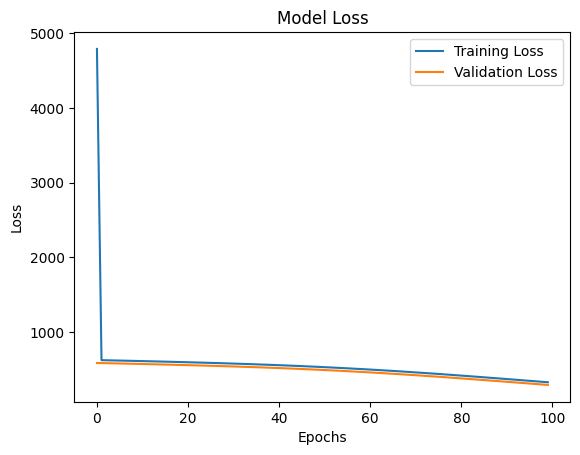

In [30]:
 plt.plot(history.history['loss'], label='Training Loss')
 plt.plot(history.history['val_loss'], label='Validation Loss')
 plt.title('Model Loss')
 plt.xlabel('Epochs')
 plt.ylabel('Loss')
 plt.legend() # Auto-detects labels from plt.plot()
 plt.show()

In [31]:
 loss, mae = model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 252.0215 - mean_absolute_error: 13.5759 
